In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras import layers
from keras import optimizers
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()     # mnist 이미지 불러오기
x_train, x_test = x_train/255, x_test/255     # 정규화

# 후에 최종 정확도 계산시 쓰임
final_y = np.empty((2500, 4))
for i in range(2500):
  final_y[i] = np.array((y_test[i * 4 + 0], y_test[i * 4 + 1], y_test[i * 4 + 2], y_test[i * 4 + 3]))
# one hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
def softmax(x):
    c = np.max(x)
    f_x = np.exp(x - c) / np.sum(np.exp(x - c))
    return f_x

In [3]:
# 4장씩 묶인 mnist 데이터 저장변수
x4_train = np.empty((15000,56, 56))
y4_train = np.empty((15000, 40))

x4_test = np.empty((2500,56, 56))
y4_test = np.empty((2500, 40))

# 4장씩 묶기
for count in range(15000):     # x_train
    for i in range(28):
        x4_train[count][i] = np.array(np.concatenate((x_train[count * 4 + 0][i], x_train[count * 4 + 1][i])))
        x4_train[count][28 + i] = np.array(np.concatenate((x_train[count * 4 + 2][i], x_train[count * 4 + 3][i])))


for i in range(15000):     # y_train
  y4_train[i] = np.array(np.concatenate((y_train[i * 4 + 0], y_train[i * 4 + 1], y_train[i * 4 + 2], y_train[i * 4 + 3])))
  

for count in range(2500):     # x_test
    for i in range(28):
        x4_test[count][i] = np.array(np.concatenate((x_test[count * 4 + 0][i], x_test[count * 4 + 1][i])))
        x4_test[count][28 + i] = np.array(np.concatenate((x_test[count * 4 + 2][i], x_test[count * 4 + 3][i])))


for i in range(2500):     # y_test
  y4_test[i] = np.array(np.concatenate((y_test[i * 4 + 0], y_test[i * 4 + 1], y_test[i * 4 + 2], y_test[i * 4 + 3])))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 54, 54, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 54, 54, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 52, 52, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0         
 2D)                                                             
                                                      

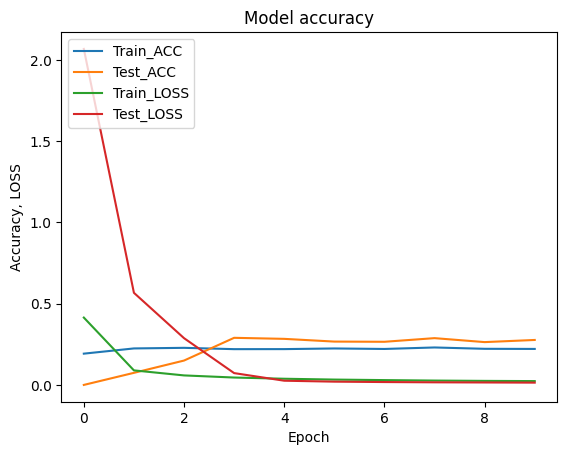

79/79 [==============================] - 15s 185ms/step
364


In [12]:
# 모델 세부사항 // 학습 1시간 걸림

model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(56, 56, 1)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),


    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(40, activation='sigmoid')
  ])

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(x4_train, y4_train, batch_size=100, epochs=10, validation_data=(x4_test, y4_test))

# 6 훈련 과정 시각화 (정확도)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy, LOSS')
plt.legend(['Train_ACC', 'Test_ACC', 'Train_LOSS', 'Test_LOSS'], loc='upper left')
plt.show()

predictions = model.predict(x4_test[:2500])

# asd = 0
# arr = predictions - y4_test
# for a, i in enumerate(arr):
#   for j in range(40):
#     if not -0.5 < i[j] < 0.5:
#       asd += 1
#       break

# print(asd)

In [15]:
# 모델 저장
model.save('error_140.h5')

In [16]:
# 내장함수로 loss, accuracy 측정

loss, accuracy = model.evaluate(x4_train, y4_train)
print("Train Loss:", loss)
print("Train Accuracy:", accuracy)

loss, accuracy = model.evaluate(x4_test, y4_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

469/469 [==============================] - 80s 170ms/step - loss: 0.0049 - accuracy: 0.2347
Train Loss: 0.004944541957229376
Train Accuracy: 0.23473332822322845
79/79 [==============================] - 16s 200ms/step - loss: 0.0141 - accuracy: 0.2768
Test Loss: 0.014064723625779152
Test Accuracy: 0.2768000066280365


In [18]:
# 모델이 예측한 값과 실제값 비교
Final_predictions = np.empty((2500,4))  # 모델이 예측한 값

for i in range(2500):
  Final_predictions[i][0] = np.argmax(softmax(predictions[i][0:10]))
  Final_predictions[i][1] = np.argmax(softmax(predictions[i][10:20]))
  Final_predictions[i][2] = np.argmax(softmax(predictions[i][20:30]))
  Final_predictions[i][3] = np.argmax(softmax(predictions[i][30:40]))

arr = Final_predictions - final_y  # 모델이 예측한 값과 실제값을 비교하기 위한 변수
asd = [] # 예측 실패한 사진의 번호 저장

for i in range(2500):   # 예측 검증
  if np.sum(arr[i]) != 0:
    asd.append(i)

print(len(asd)) #예측 실패 갯수 출력
print(*asd) # 예측 실패 사진 번호 전부 출력

140
43 48 64 80 85 111 112 123 137 145 147 168 199 236 253 258 259 276 278 295 306 311 315 320 324 361 375 382 388 392 420 427 430 438 469 475 489 510 513 527 529 532 533 547 573 581 592 595 598 611 651 662 663 689 692 709 724 731 736 738 748 751 757 768 806 822 834 875 880 889 893 899 931 937 941 952 958 963 1001 1003 1015 1018 1050 1051 1052 1067 1072 1108 1124 1127 1143 1150 1159 1164 1174 1182 1185 1190 1201 1203 1209 1221 1285 1289 1311 1319 1433 1472 1484 1488 1520 1522 1539 1541 1543 1626 1638 1642 1644 1649 1656 1662 1686 1858 2023 2061 2102 2131 2252 2253 2254 2405 2408 2410 2416 2423 2425 2432 2459 2495


[2. 1. 5. 8.]
[2. 1. 5. 8.]
[0. 0. 0. 0.]


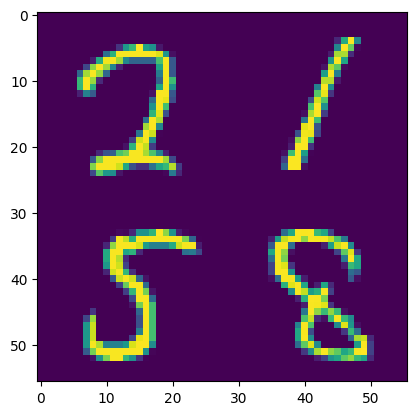

In [35]:
# 해당 번호 사진 및 예측 결과, 정답 출력
i = 314
print(Final_predictions[i])
print(final_y[i])
print(arr[i])
plt.imshow(x4_test[i])